In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [47]:
# Carga desde un archivo .xlsx sin indice
Mexico = pd.read_csv('Mexico.csv')

In [48]:
# Verificamos información del dataframe
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26582 non-null  int64  
 1   last_scraped                                  26582 non-null  object 
 2   name                                          26582 non-null  object 
 3   host_id                                       26582 non-null  int64  
 4   host_name                                     26582 non-null  object 
 5   host_since                                    26582 non-null  object 
 6   host_response_time                            26582 non-null  object 
 7   host_is_superhost                             26582 non-null  object 
 8   host_identity_verified                        26582 non-null  object 
 9   neighbourhood                                 26582 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [49]:
#Calculamos el numero total de la población "n"

Mexico['accommodates'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: accommodates
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [50]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Mexico['accommodates'].max()
Min = Mexico['accommodates'].min()
Limites = [Min, Max]
Limites

[1.0, 10.0]

In [51]:
# Calculamos el rango R
R = Max - Min
R

9.0

In [52]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 26582

ni = 1 + 3.32 * np.log10(n)
ni

15.689631010177528

In [53]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

0.5736272570184661

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [54]:
# Categorización de variables
intervalos = np.linspace (1, 10, 16)
intervalos

array([ 1. ,  1.6,  2.2,  2.8,  3.4,  4. ,  4.6,  5.2,  5.8,  6.4,  7. ,
        7.6,  8.2,  8.8,  9.4, 10. ])

In [55]:
# Creamos las categorías
categorias = [ 
"Individual", 
"Pareja", 
"Pareja estándar",
"Grupo", 
"Grupo pequeño", 
"Familiar",
"Familiar grande",
"Grupo mediano",
"Grupo grande",
"Grupo extra grande",
"Alojamiento amplio",
"Alojamiento grande",
"Alojamiento muy grande",
"Alojamiento extendido",
"Alojamiento máximo" ]

In [ ]:
# Creamos las ctegorias en la columna numerica
Mexico ['accommodates'] = pd.cut ( x = Mexico  ['accommodates'], bins = intervalos, labels = categorias )
Mexico ['accommodates']

0               Pareja
1                Grupo
2        Grupo pequeño
3               Pareja
4               Pareja
             ...      
26577    Grupo pequeño
26578           Pareja
26579           Pareja
26580           Pareja
26581           Pareja
Name: accommodates, Length: 26582, dtype: category
Categories (15, object): ['Individual' < 'Pareja' < 'Pareja estándar' < 'Grupo' ... 'Alojamiento grande' < 'Alojamiento muy grande' < 'Alojamiento extendido' < 'Alojamiento máximo']

In [57]:
table1 = freq_tbl(Mexico['accommodates'])
table1

,accommodates,frequency,percentage,cumulative_perc
0,Pareja,10620,0.399518,0.450975
1,Grupo pequeño,5690,0.214055,0.692598
2,Grupo,2927,0.110112,0.816892
3,Grupo grande,1800,0.067715,0.893329
4,Familiar grande,1375,0.051727,0.951718
5,Alojamiento grande,516,0.019412,0.973629
6,Grupo extra grande,311,0.011700,0.986836
7,Alojamiento máximo,216,0.008126,0.996008
8,Alojamiento extendido,94,0.003536,1.000000
9,Individual,0,0.000000,1.000000


In [58]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,accommodates,frequency
0,Pareja,10620
1,Grupo pequeño,5690
2,Grupo,2927
3,Grupo grande,1800
4,Familiar grande,1375
5,Alojamiento grande,516
6,Grupo extra grande,311
7,Alojamiento máximo,216
8,Alojamiento extendido,94
9,Individual,0


In [59]:
Filtro = table2[ table2['frequency'] >= 94]
Filtro

,accommodates,frequency
0,Pareja,10620
1,Grupo pequeño,5690
2,Grupo,2927
3,Grupo grande,1800
4,Familiar grande,1375
5,Alojamiento grande,516
6,Grupo extra grande,311
7,Alojamiento máximo,216
8,Alojamiento extendido,94


In [60]:
# Ajusto el indice de mi data frame

Filtro_index = Filtro.set_index('accommodates')
Filtro_index

,frequency
accommodates,
Pareja,10620
Grupo pequeño,5690
Grupo,2927
Grupo grande,1800
Familiar grande,1375
Alojamiento grande,516
Grupo extra grande,311
Alojamiento máximo,216
Alojamiento extendido,94


<Axes: xlabel='accommodates'>

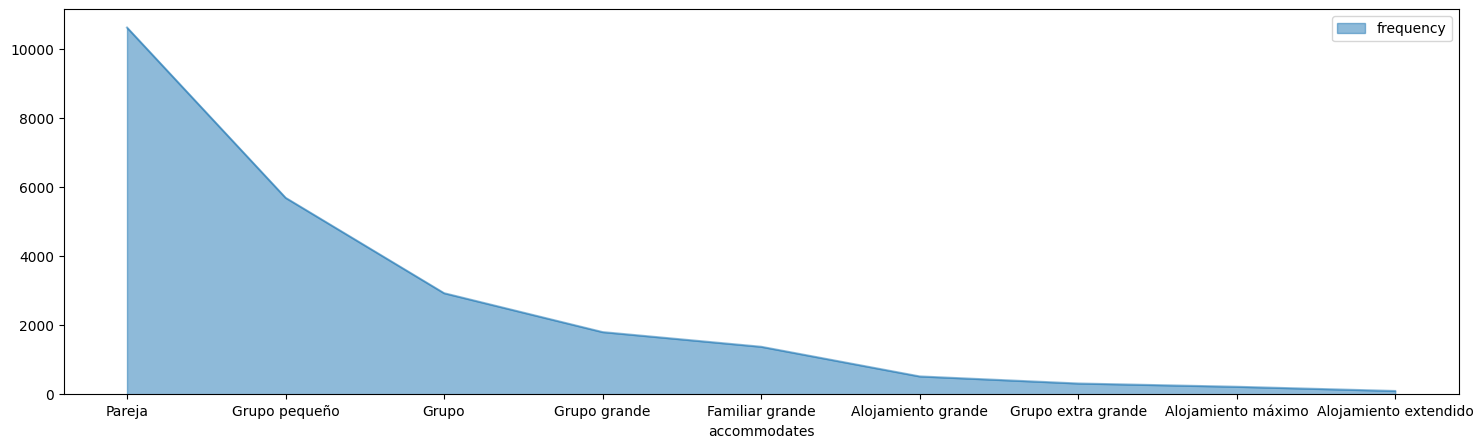

In [64]:
# Realizamos gráfico de area del dataframe filtrado
Filtro_index.plot(kind = 'area', figsize = (18,5), alpha = 0.5)